In [1]:
import sklearn

assert sklearn.__version__ >= "1.0.1"

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# 선형 회귀

선형 회귀 모델을 구현하는 과정을 살펴본다.

아래 코드는 선형 회귀 모델 훈련에 사용될 데이터 100개를 생성한다.
`y = 4 + 3 * X ` 1차 함수를 모델로 하는 데이터이며
약간의 잡음이 추가된다.

In [4]:
import numpy as np

np.random.seed(42)                     # 무작위성 지정

m = 100                                # 데이터셋 크기

X = 2 * np.random.rand(m, 1)           # 입력 데이터셋: 0에서 2 사이의 임의의 값 100개.
y = 4 + 3 * X + np.random.randn(m, 1)  # y = 4 + 3*X 함수를 이용한 타깃값 생성. 잡음 추가됨.

In [5]:
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

In [6]:
y

array([[ 6.33428778],
       [ 9.40527849],
       [ 8.48372443],
       [ 5.60438199],
       [ 4.71643995],
       [ 5.29307969],
       [ 5.82639572],
       [ 8.67878666],
       [ 6.79819647],
       [ 7.74667842],
       [ 5.03890908],
       [10.14821022],
       [ 8.46489564],
       [ 5.7873021 ],
       [ 5.18802735],
       [ 6.06907205],
       [ 5.12340036],
       [ 6.82087644],
       [ 6.19956196],
       [ 4.28385989],
       [ 7.96723765],
       [ 5.09801844],
       [ 5.75798135],
       [ 5.96358393],
       [ 5.32104916],
       [ 8.29041045],
       [ 4.85532818],
       [ 6.28312936],
       [ 7.3932017 ],
       [ 4.68275333],
       [ 9.53145501],
       [ 5.19772255],
       [ 4.64785995],
       [ 9.61886731],
       [ 7.87502098],
       [ 8.82387021],
       [ 5.88791282],
       [ 7.0492748 ],
       [ 7.91303719],
       [ 6.9424623 ],
       [ 4.69751764],
       [ 5.80238342],
       [ 5.34915394],
       [10.20785545],
       [ 6.34371184],
       [ 7

데이터를 산점도로 그리면 잡음 때문에 일직선이 아닌
선형적으로 퍼져 있는 데이터를 볼 수 있다.

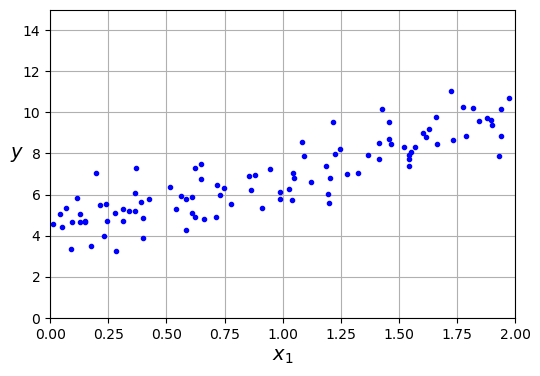

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

## 정규  방정식

$x_1$ 과 $y$ 사이의 관계를 가장 잘 표현하는 직선은 수학적으로 정확하게 구할 수 있다.
즉, 아래 식을 가장 잘 충족시키는 파라미터 벡터 $\theta$를 수학적으로 계산할 수 있다.

$$
\mathbf y = \mathbf{X}\, \mathbf{\theta}
$$

**(참고) `np.linalg.inv()` 함수**

역행렬이 존재하는 경우 `np.linalg.inv()` 함수가 역행렬을 계산한다.
아래 코드는 아래 식을 구현한다.
`theta_best` 가 $\hat{\mathbf{\theta}}$ 에 해당한다.

$$
\hat{\mathbf{\theta}} =
(\mathbf{X}^T\, \mathbf{X})^{-1}\, \mathbf{X}^T\, \mathbf{y}
$$

```python
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)   # 절편과의 곱을 위해 필요한 1 추가
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
```

In [8]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)   # 절편과의 곱을 위해 필요한 1 추가
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

```python
theta_best
```

In [9]:
theta_best

array([[4.21509616],
       [2.77011339]])

```python
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # 절편과의 곱을 위한 1 추가.

y_predict = X_new_b @ theta_best
y_predict
```

In [10]:
X_new = np.array([[0], [2]]) # x에 0과 2를 넣기 -> y값도 두개 나옴
X_new_b = add_dummy_feature(X_new) # 세타0 앞에 1이라는 x값이 있다고 생각해서 1을 추가하는 식

In [11]:
y_predict = X_new_b @ theta_best # 내적(쉽게 말해 곱하기라고 생각)
y_predict

array([[4.21509616],
       [9.75532293]])

```python
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

plt.show()
```

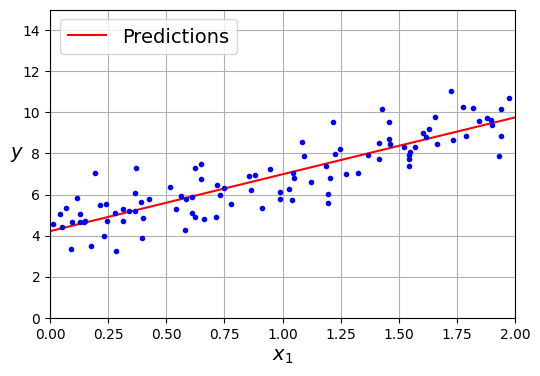

## `LinearRegression` 클래스

```python
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

# 절편과 기울기
lin_reg.intercept_, lin_reg.coef_
```

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [13]:
lin_reg.intercept_ #세타0

array([4.21509616])

In [14]:
lin_reg.coef_ #세타1

array([[2.77011339]])

```python
lin_reg.predict(X_new)
```

In [15]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

# 경사 하강법

## 선형 회귀 모델과 경사 하강법

### 배치 경사 하강법

아래 코드는 선형 회귀 모델에 대해 적용하는 배치 경사 하강법을
순수 파이썬 코드로 구현한다.

```python
eta = 0.1                            # 학습률
n_epochs = 1000                      # 에포크 수
m = len(X_b)                         # 훈련셋 크기

np.random.seed(42)

theta = np.random.randn(2, 1)        # 임의로 초기화된 파라미터. (2, 1) 모양의 어레이

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)  # MSE의 그레이디언트
    theta = theta - eta * gradients                # 파라미터 업데이트
```

In [12]:
# 그레이디언트: x의 미분값, 기울기

In [16]:
eta = 0.1                            # 학습률
n_epochs = 1000                      # 에포크 수
m = len(X_b)                         # 훈련셋 크기

np.random.seed(42)

theta = np.random.randn(2, 1)        # 임의로 초기화된 파라미터. (2, 1) 모양의 어레이

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)  # MSE의 그레이디언트 -> 기울기
    theta = theta - eta * gradients                # 파라미터 업데이트 -> 기울기의 반대방향으로 파라미터를 업뎃하는 식

```python
theta
```

In [17]:
theta

array([[4.21509616],
       [2.77011339]])

**학습률과 경사 하강법의 관계**

아래 코드는 학습률에 따라 파라미터의 수렴 여부와 속도가 달라짐을 보여준다.

```python
import matplotlib as mpl

# 아래 그래프를 그리는 함수
# 학습률이 지정되었을 때, 파라미터 수렴 과정을 직선의 수렴과정으로 그림.
def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    
    n_epochs = 1000  # 에포크 수
    
    n_shown = 20     # 아래 그래프에서 보이는 20개의 그래프 그리기 용도
    
    theta_path = []  # 훈련 과정동안 업데이트 되는 파라미터 수렴 과정 확인 용도
    
    # 경사 하강법 1000번 반복
    for epoch in range(n_epochs):
        # 첫 20개의 파라미터 업데이트 확인용 직선 그리기
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
            
        # 경사 하강법
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        
        # 학습괸 파라미터 저장
        theta_path.append(theta)
        
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path                # 저장된 파라미터 어레이 반환

np.random.seed(42)
theta = np.random.randn(2, 1)  # 파라미터 무작위 초기화

plt.figure(figsize=(10, 4))

# 학습률: 0.02
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)

# 학습률: 0.1
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)  # 반환값은 이어지는 그래프에서 활용됨.
plt.gca().axes.yaxis.set_ticklabels([])

# 학습률: 0.5
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)

plt.show()
```

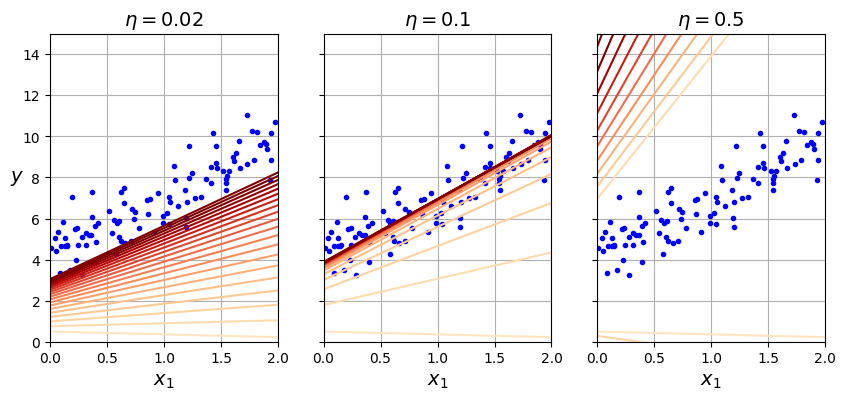

### 확률적 경사 하강법

**사이킷런의 `SGDRegressor` 클래스**


```python
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, eta0=0.01,
                       n_iter_no_change=100, random_state=42)

sgd_reg.fit(X, y.ravel())  # y.ravel(): 타깃값을 1차원 어레로 변환
```

- max_iter : 최대에포크 수
- tol : loss의 변화값이 tol 미만일 때 일찍 중지
- eta0 : 학습율
- n_iter_no_change : 지정한 반복 횟수동안 검증점수가 좋아 지지 않으면 훈련을 조기 종료


In [26]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, eta0=0.01,
                       n_iter_no_change=100, random_state=42)

sgd_reg.fit(X, y.ravel())  # y.ravel(): 타깃값을 1차원 어레로 변환

SGDRegressor(n_iter_no_change=100, random_state=42, tol=1e-05)

```python
sgd_reg.intercept_, sgd_reg.coef_
```

In [27]:
sgd_reg.intercept_

array([4.21353251])

In [28]:
sgd_reg.coef_

array([2.77191196])

#### 직접구현

In [16]:
theta_path_sgd = []

m = len(X_b)
np.random.seed(42)

In [17]:
n_epochs = 50   # 에포크 수
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

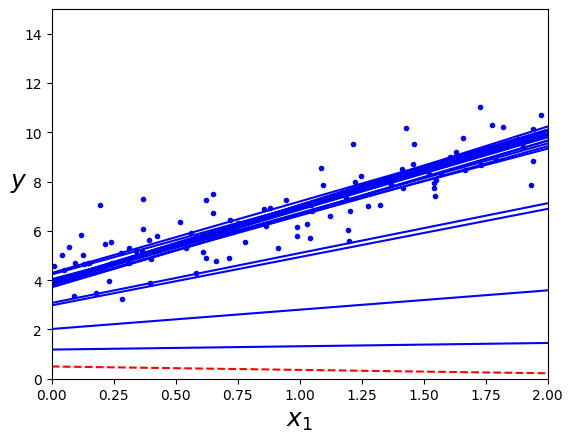

In [18]:
theta = np.random.randn(2,1)    # 파라미터 랜덤 초기화

for epoch in range(n_epochs):

    # 매 샘플에 대해 그레이디언트 계산 후 파라미터 업데이트
    for i in range(m):

        # 처음 20번 선형 모델(직선) 그리기
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)

        # 파라미터 업데이트
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # 하나의 샘플에 대한 그레이디언트 계산
        eta = learning_schedule(epoch * m + i)        # 학습 스케쥴을 이용한 학습률 조정
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [19]:
theta

array([[4.21076011],
       [2.74856079]])

### 미니 배치 경사 하강법

```python
from math import ceil

n_epochs = 50         # 에포크 수
minibatch_size = 20   # 미니 배치 크기

n_batches_per_epoch = ceil(m / minibatch_size)  # 스텝 수

np.random.seed(42)
theta = np.random.randn(2, 1)  # 파라미터 무작위 초기화

# 학습 스케줄
t0, t1 = 200, 1000

def learning_schedule(t):
    return t0 / (t + t1)

# 미니 배치의 파라미터 수렴 과정
theta_path_mgd = []

# 미니 배치 경사 하강법 훈련
for epoch in range(n_epochs):
    
    # 무작위 섞기
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    # 미니 배치 경사 하강법 반복
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]  # 미니 배치 묶음
        yi = y_shuffled[idx : idx + minibatch_size]
        
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi) # 그레이디언트
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
```

In [21]:
from math import ceil

n_epochs = 50         # 에포크 수
minibatch_size = 20   # 미니 배치 크기

n_batches_per_epoch = ceil(m / minibatch_size)  # 스텝 수

np.random.seed(42)
theta = np.random.randn(2, 1)  # 파라미터 무작위 초기화

# 학습 스케줄
t0, t1 = 200, 1000

def learning_schedule(t):
    return t0 / (t + t1)

# 미니 배치의 파라미터 수렴 과정
theta_path_mgd = []

# 미니 배치 경사 하강법 훈련
for epoch in range(n_epochs):
    
    # 무작위 섞기
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    # 미니 배치 경사 하강법 반복
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]  # 미니 배치 묶음
        yi = y_shuffled[idx : idx + minibatch_size]
        
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi) # 그레이디언트
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [22]:
theta

array([[4.2857119],
       [2.8119161]])

**경사 하강법 비교**

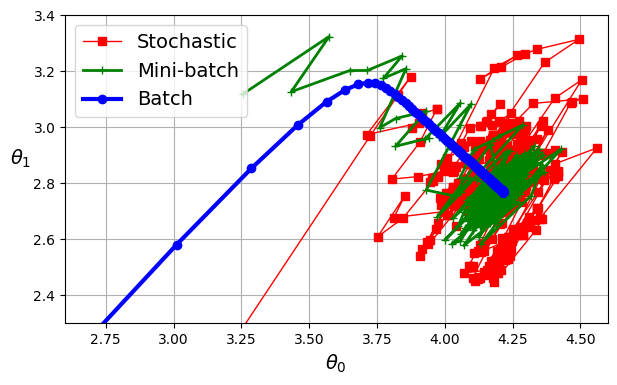

In [21]:
# 아래 그래프 그리기
# 세 종류의 경사 하강법에서 파라미터가 수렴하는 과정을 보여줌.

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
plt.show()